# Exploratory Data Analysis Tasks
- Load in your csv.gz's of results for each year extracted.
- Concatenate the data into 1 dataframe for the remainder of the analysis.

Once you have your data from the API, they would like you to perform some light EDA to show:
- How many movies had at least some valid financial information (values > 0 for budget OR revenue)?

Please exclude any movies with 0's for budget AND revenue from the remaining visualizations.
- How many movies are there in each of the certification categories (G/PG/PG-13/R)?
- What is the average revenue per certification category?
- What is the average budget per certification category?

# Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [2]:
filename1 = '/Users/jasontracey/Documents/GitHub/Project-3-Part-1/Data/final_tmdb_data_2000.csv.gz'
filename2 = '/Users/jasontracey/Documents/GitHub/Project-3-Part-1/Data/final_tmdb_data_2001.csv.gz'

df1 = pd.read_csv(filename1, index_col = 'imdb_id')
df2 = pd.read_csv(filename2, index_col = 'imdb_id')

In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1238 entries, 0 to tt7802790
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  1237 non-null   float64
 1   backdrop_path          686 non-null    object 
 2   belongs_to_collection  116 non-null    object 
 3   budget                 1237 non-null   float64
 4   genres                 1237 non-null   object 
 5   homepage               63 non-null     object 
 6   id                     1237 non-null   float64
 7   original_language      1237 non-null   object 
 8   original_title         1237 non-null   object 
 9   overview               1216 non-null   object 
 10  popularity             1237 non-null   float64
 11  poster_path            1115 non-null   object 
 12  production_companies   1237 non-null   object 
 13  production_countries   1237 non-null   object 
 14  release_date           1228 non-null   object 
 15  reve

In [4]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1335 entries, 0 to tt9212730
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  1334 non-null   float64
 1   backdrop_path          719 non-null    object 
 2   belongs_to_collection  92 non-null     object 
 3   budget                 1334 non-null   float64
 4   genres                 1334 non-null   object 
 5   homepage               109 non-null    object 
 6   id                     1334 non-null   float64
 7   original_language      1334 non-null   object 
 8   original_title         1334 non-null   object 
 9   overview               1305 non-null   object 
 10  popularity             1334 non-null   float64
 11  poster_path            1196 non-null   object 
 12  production_companies   1334 non-null   object 
 13  production_countries   1334 non-null   object 
 14  release_date           1319 non-null   object 
 15  reve

In [5]:
df = pd.concat([df1, df2], axis=0)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2573 entries, 0 to tt9212730
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  2571 non-null   float64
 1   backdrop_path          1405 non-null   object 
 2   belongs_to_collection  208 non-null    object 
 3   budget                 2571 non-null   float64
 4   genres                 2571 non-null   object 
 5   homepage               172 non-null    object 
 6   id                     2571 non-null   float64
 7   original_language      2571 non-null   object 
 8   original_title         2571 non-null   object 
 9   overview               2521 non-null   object 
 10  popularity             2571 non-null   float64
 11  poster_path            2311 non-null   object 
 12  production_companies   2571 non-null   object 
 13  production_countries   2571 non-null   object 
 14  release_date           2547 non-null   object 
 15  reve

# Movies with valid financial info.

In [7]:
budget = df['budget'] > 0
revenue = df['revenue'] > 0

In [8]:
combined = budget | revenue
combined

imdb_id
0            False
tt0113026     True
tt0113092    False
tt0116391    False
tt0118694     True
             ...  
tt7797790    False
tt8665056    False
tt8795764    False
tt9071078    False
tt9212730    False
Length: 2573, dtype: bool

In [9]:
combined_df = df[combined]
combined_df

,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,overview,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
imdb_id,,,,,,,,,,,,,,,,,,,,,
tt0113026,0.0,/vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg,NaN,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,62127.0,en,The Fantasticks,Two rural teens sing and dance their way throu...,...,0.0,86.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Try to remember the first time magic happened,The Fantasticks,0.0,5.500,22.0,NaN
tt0118694,0.0,/n4GJFGzsc7NinI1VeGDXIcQjtU2.jpg,"{'id': 1131062, 'name': 'Wong Kar-Wai’s Love T...",150000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,843.0,cn,花樣年華,Two neighbors become intimate after discoverin...,...,14204632.0,99.0,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,"Feel the heat, keep the feeling burning, let t...",In the Mood for Love,0.0,8.114,2217.0,PG
tt0119273,0.0,/f5C03doOWiauu37bToKXtpgP5bS.jpg,"{'id': 141086, 'name': 'Heavy Metal Collection...",15000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",NaN,16225.0,en,Heavy Metal 2000,Upon discovery of a shard of what could be the...,...,0.0,88.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,not to survive the fight in the external world...,Heavy Metal 2000,0.0,6.100,181.0,R
tt0120263,0.0,/ynXVuylP8upazjz8lrqb1PEMkdR.jpg,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 35, 'name...",NaN,34070.0,sv,Sånger från andra våningen,A monumental traffic jam serves as the backdro...,...,80334.0,99.0,"[{'english_name': 'Russian', 'iso_639_1': 'ru'...",Released,NaN,Songs from the Second Floor,0.0,7.200,239.0,NaN
tt0120467,0.0,/knok3mNReKqPTplnnqz7E4dd7mD.jpg,NaN,120000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 27, 'name...",NaN,19085.0,en,Vulgar,Vulgar is about a man who is a children's clow...,...,14904.0,87.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Everyone loves a clown... some more than others.,Vulgar,0.0,5.500,44.0,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
tt0445841,0.0,/lO3XAxV38SC7ZuuNVdy6E6nOZac.jpg,NaN,12500000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,233308.0,zh,一個爛賭的傳說,Suki is a very devoted gambler. Whenever he go...,...,123021750.0,94.0,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,NaN,A Gambler's Story,0.0,6.800,3.0,NaN
tt0867181,0.0,NaN,NaN,5000.0,"[{'id': 53, 'name': 'Thriller'}]",NaN,749151.0,en,Patient,"Patient introduces us two brothers, Jode and S...",...,0.0,88.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Only a miracle can save Sean now,Patient,0.0,0.000,0.0,NaN
tt1039952,0.0,/yTGmGjAd0gfpVK0ezoqWgx7AJkp.jpg,NaN,500000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",NaN,69399.0,ta,சிட்டிசன்,"Three prominent members of society, a judge, a...",...,500000.0,157.0,"[{'english_name': 'Tamil', 'iso_639_1': 'ta', ...",Released,NaN,Citizen,0.0,6.633,15.0,NaN


In [10]:
combined_df.duplicated().sum()

0

In [11]:
print(f'There are {len(combined_df)} total movies with financial data.')

There are 638 total movies with financial data.


In [12]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 638 entries, tt0113026 to tt2957918
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  638 non-null    float64
 1   backdrop_path          541 non-null    object 
 2   belongs_to_collection  110 non-null    object 
 3   budget                 638 non-null    float64
 4   genres                 638 non-null    object 
 5   homepage               76 non-null     object 
 6   id                     638 non-null    float64
 7   original_language      638 non-null    object 
 8   original_title         638 non-null    object 
 9   overview               636 non-null    object 
 10  popularity             638 non-null    float64
 11  poster_path            619 non-null    object 
 12  production_companies   638 non-null    object 
 13  production_countries   638 non-null    object 
 14  release_date           637 non-null    object 
 1

# Movie totals of each rating (G/PG/PG-13/R)

In [13]:
rated_g = combined_df[combined_df['certification'] == 'G']
rated_pg = combined_df[combined_df['certification'] == 'PG']
rated_pg13 = combined_df[combined_df['certification'] == 'PG-13']
rated_r = combined_df[combined_df['certification'] == 'R']
rated_nr = combined_df[combined_df['certification'] == 'NR']

In [14]:
combined_df['certification'].value_counts()

R        232
PG-13    131
PG        35
NR        17
G         15
Name: certification, dtype: int64

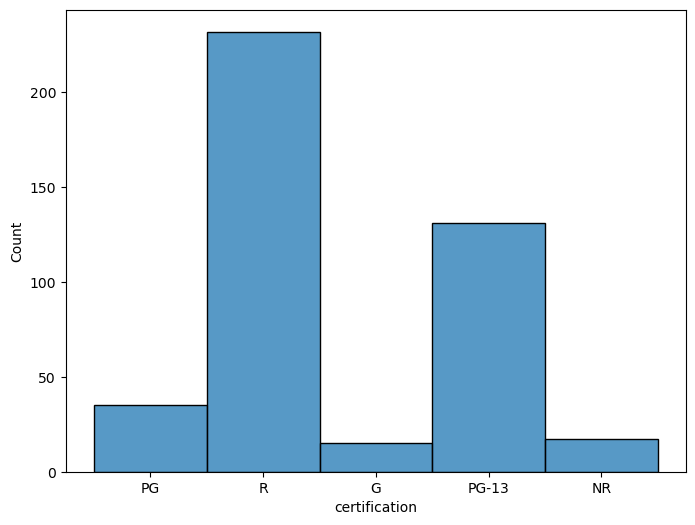

In [15]:
fig, ax = plt.subplots(figsize = (8, 6))
ax = sns.histplot(data = combined_df, x = 'certification');

In [16]:
print(f'There are {len(rated_pg)} rated PG movies')
print('')
print(f'There are {len(rated_r)} rated R movies')
print('')
print(f'There are {len(rated_g)} rated G movies')
print('')
print(f'There are {len(rated_pg13)} rated PG-13 movies')
print('')
print(f'There are {len(rated_nr)} rated NR movies')

There are 35 rated PG movies

There are 232 rated R movies

There are 15 rated G movies

There are 131 rated PG-13 movies

There are 17 rated NR movies


# What is the average revenue per rating?

In [17]:
dataframes = (rated_g, rated_pg, rated_pg13, rated_r, rated_nr)
ratings = ['G', 'PG', 'PG-13', 'R', 'NR']
revenue = []
count = 0
# Create a dataframe of revenues
revenue_df = pd.DataFrame()
  
for df in dataframes:

    avg_revenue = round(df['revenue'].mean())
    movie_rating = ratings[count]
    revenue.append(avg_revenue)
    count += 1

# print(revenue)
# print(ratings)
revenue_df = pd.DataFrame(ratings, columns=['Ratings'])
revenue_df['Revenue'] = revenue
revenue_df

,Ratings,Revenue
0,G,117364761
1,PG,110679080
2,PG-13,99287858
3,R,32465052
4,NR,9588674


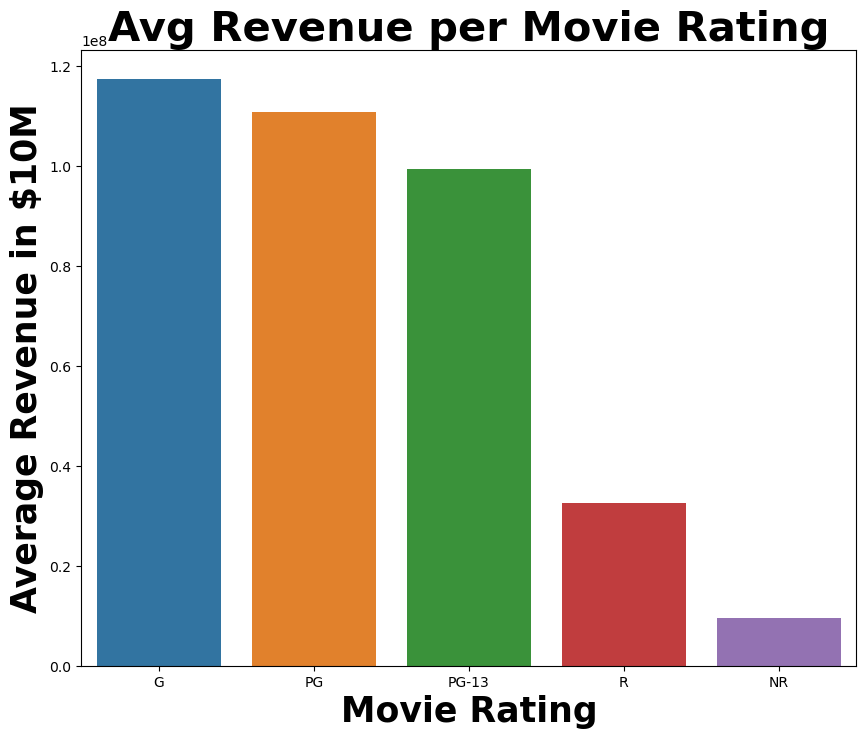

In [18]:
fig, ax = plt.subplots(figsize = (10, 8))
ax = sns.barplot(data = revenue_df, x = 'Ratings', y = 'Revenue')

ax.set_title('Avg Revenue per Movie Rating', fontsize = 30, fontweight = 'bold')
ax.set_xlabel('Movie Rating', fontsize = 25, fontweight = 'bold')
ax.set_ylabel('Average Revenue in $10M', fontsize = 25, fontweight = 'bold');

# What is the average budget per rating?

In [19]:
dataframes = (rated_g, rated_pg, rated_pg13, rated_r, rated_nr)
ratings = ['G', 'PG', 'PG-13', 'R', 'NR']
budget = []
count = 0
# Create a dataframe of budgets
budget_df = pd.DataFrame()
  
for df in dataframes:

    avg_budget = round(df['budget'].mean())
    movie_rating = ratings[count]
    budget.append(avg_budget)
    count += 1

# print(budget)
# print(ratings)
budget_df = pd.DataFrame(ratings, columns=['Ratings'])
budget_df['Budget'] = budget
budget_df

,Ratings,Budget
0,G,38133333
1,PG,44828492
2,PG-13,42993572
3,R,19484071
4,NR,6302358


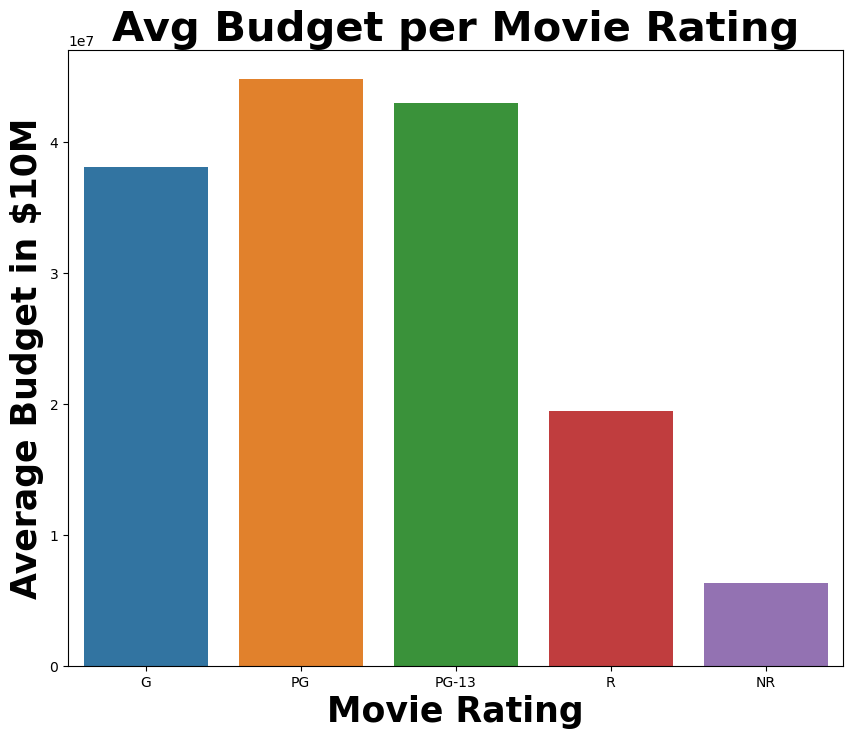

In [21]:
fig, ax = plt.subplots(figsize = (10, 8))
ax = sns.barplot(data = budget_df, x = 'Ratings', y = 'Budget')

ax.set_title('Avg Budget per Movie Rating', fontsize = 30, fontweight = 'bold')
ax.set_xlabel('Movie Rating', fontsize = 25, fontweight = 'bold')
ax.set_ylabel('Average Budget in $10M', fontsize = 25, fontweight = 'bold');

# Save Merged File to Data Folder

In [22]:
combined_df.to_csv('Data/tmdb_results_combined.csv.gz',compression='gzip',index=False)